# Library Import

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import os
import random


time: 638 ms (started: 2022-06-20 19:50:27 +00:00)


# Item Selection

I selected all the assets that had data from 2008-01-01 among the S&P500 stock list.

In [2]:
path = './stock_data'
stock08 = []
for file in os.listdir(path):
    file_path = path + '/' + file
    date = pd.read_csv(file_path)['Date']
    if len(date)>0 and pd.read_csv(file_path)['Date'][0] <= '2008-01-01' :
        stock08.append(file)
print(str(len(stock08))+" stocks selected")
print(stock08)

446 stocks selected
['EXR.csv', 'RCL.csv', 'CLX.csv', 'NSC.csv', 'CXO.csv', 'AKAM.csv', 'WM.csv', 'EBAY.csv', 'GIS.csv', 'MMC.csv', 'PBCT.csv', 'RE.csv', 'MAT.csv', 'DISH.csv', 'UTX.csv', 'TROW.csv', 'MKC.csv', 'NTRS.csv', 'BXP.csv', 'DUK.csv', 'ED.csv', 'AFL.csv', 'RMD.csv', 'PG.csv', 'AME.csv', 'AOS.csv', 'MOS.csv', 'EQR.csv', 'PPL.csv', 'FAST.csv', 'SYK.csv', 'URI.csv', 'PCAR.csv', 'ADS.csv', 'HRL.csv', 'HIG.csv', 'DVN.csv', 'SHW.csv', 'SIVB.csv', 'PVH.csv', 'TXN.csv', 'PNR.csv', 'KLAC.csv', 'AMGN.csv', 'FMC.csv', 'HST.csv', 'INCY.csv', 'CCI.csv', 'LUK.csv', 'CDNS.csv', 'CTAS.csv', 'UNM.csv', 'RF.csv', 'STZ.csv', 'PH.csv', 'SRE.csv', 'AMAT.csv', 'COL.csv', 'MRK.csv', 'MA.csv', 'ARE.csv', 'CI.csv', 'ESS.csv', 'SJM.csv', 'CRM.csv', 'MYL.csv', 'ACN.csv', 'SBAC.csv', 'TMK.csv', 'BBT.csv', 'XOM.csv', 'PRGO.csv', 'GILD.csv', 'IR.csv', 'VAR.csv', 'MAC.csv', 'FLIR.csv', 'EIX.csv', 'NOC.csv', 'AGN.csv', 'MCHP.csv', 'MLM.csv', 'SRCL.csv', 'DISCA.csv', 'LOW.csv', 'CELG.csv', 'LNT.csv', 'IPG.cs

# Organize Data

In order to keep concise and deal with missing data, I concatenated all the price data of the selected items above to a single dataframe

In [3]:
stock_price_dict = {}

for file in stock08 :
    path = "./stock_data/" + file
    df = pd.read_csv(path)
    df = df[df.Date >= '2008-01-01']
    pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df = df.set_index(pd.DatetimeIndex(df['Date']))
    stock_price_dict[file.split(".")[0]] = df['Adj. Close']

market_path = "./SP500_index.csv"
df = pd.read_csv(market_path)
pd.to_datetime(df['Date'], format='%Y-%m-%d')
df = df.set_index(pd.DatetimeIndex(df['Date']))
stock_price_dict['SP500'] = df['Adj Close']
    
stock_price_df = pd.DataFrame(stock_price_dict)

time: 2.93 s (started: 2022-04-24 10:54:39 +00:00)


In [4]:
print(stock_price_df.head())

                 EXR        RCL        CLX        NSC    CXO   AKAM  \
Date                                                                  
2008-01-02  9.445234  36.343681  47.021449  38.353608  21.57  33.20   
2008-01-03  9.154091  35.842085  46.690260  37.833533  22.08  34.14   
2008-01-04  9.005133  34.117300  46.690260  37.165974  21.06  32.00   
2008-01-07  8.944196  32.665313  46.925772  37.398843  21.19  31.60   
2008-01-08  8.659824  31.283725  46.447388  36.304357  22.10  29.47   

                   WM       EBAY        GIS        MMC  ...        SLG  \
Date                                                    ...              
2008-01-02  23.074025  12.782094  20.781804  20.635553  ...  74.160754   
2008-01-03  23.074025  12.919789  20.689914  20.696741  ...  71.532759   
2008-01-04  22.208570  12.313928  20.473054  20.650850  ...  69.577786   
2008-01-07  22.580501  11.975590  20.888397  20.566717  ...  69.273323   
2008-01-08  22.694942  11.806421  21.101581  20.138403  ..

# Dealing with Missing Data

In [5]:
NA_col = []
NA_ratio = []
for col in stock_price_df.columns :
    na_index = np.where(stock_price_df[col].isnull())[0]
    NA_col.append(col)
    NA_ratio.append(len(na_index)/stock_price_df.shape[0] * 100)
    print(col,na_index)
NA_df = pd.DataFrame({'tickers':NA_col,'NA_ratio':NA_ratio})


EXR [2338 2483]
RCL [2338 2483]
CLX [2338 2483]
NSC [2338 2483]
CXO [2338 2483]
AKAM [2338 2417 2483]
WM [2338 2483]
EBAY [2338 2483]
GIS [2338 2483]
MMC [2338 2483]
PBCT [2338 2483]
RE [2338 2483]
MAT [2338 2483]
DISH [2338 2483]
UTX [2338 2483]
TROW [2338 2483]
MKC [2338 2483]
NTRS [2338 2483]
BXP [2338 2483]
DUK [2338 2483]
ED [2338 2483]
AFL [2338 2483]
RMD [2338 2483]
PG [2338 2483]
AME [2338 2483]
AOS [2338 2483]
MOS [2338 2483]
EQR [2338 2483]
PPL [2338 2483]
FAST [2483]
SYK [2338 2483]
URI [2338 2483]
PCAR [2338 2483]
ADS [2338 2483]
HRL [2338 2483]
HIG [2338 2483]
DVN [2338 2483]
SHW [2338 2483]
SIVB [2338 2483]
PVH [2338 2483]
TXN [2338 2483]
PNR [2338 2483]
KLAC [2338 2483]
AMGN [2338 2483]
FMC [2338 2483]
HST [2338 2483]
INCY [2338 2483]
CCI [2338 2483]
LUK [2338 2483]
CDNS [2338 2483]
CTAS [2338 2483]
UNM [2338 2483]
RF [2338 2483]
STZ [2338 2483]
PH [2338 2483]
SRE [2338 2483]
AMAT [2338 2483]
COL [2338 2483]
MRK [2338 2483]
MA [2338 2483]
ARE [2338 2483]
CI [2338 2483]
E

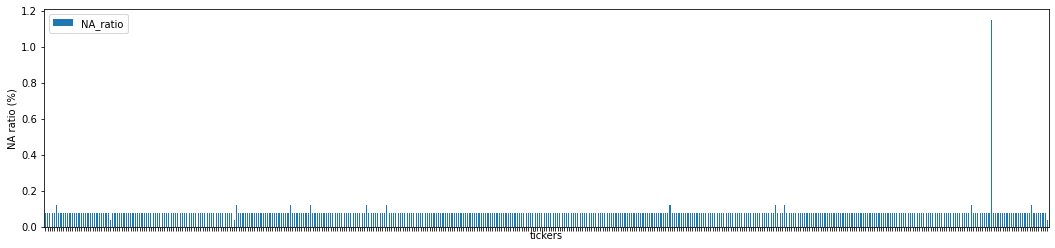

time: 1.02 s (started: 2022-04-24 10:54:42 +00:00)


In [6]:
NA_df.plot.bar(rot=0, figsize=(18,4))
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
plt.xlabel('tickers')
plt.ylabel('NA ratio (%)')
plt.show()
plt.close()

Most of the dataset that has missing data has only one or two data points missing. It would be rational enough to impute the data points with the data from the day right before.

However, one company has quite some missing data. 'MMM' is the only company that has high proportion of missing data. Leaving out this one company from the S&P 500 firms wouldn't be a big issue. So I'll drop the 'MMM' column the dataframe

In [7]:
stock_price_df = stock_price_df.drop(['MMM'], axis=1)

time: 2.06 ms (started: 2022-04-24 10:54:43 +00:00)


In [8]:
def impute_data(column_name):
    index = stock_price_df.index.values[0]
    price_na_index = np.where(stock_price_df[column_name].isnull())[0]
    for i in price_na_index :
        stock_price_df[column_name][i] = stock_price_df[column_name][i-1]

time: 7.56 ms (started: 2022-04-24 10:54:43 +00:00)


In [9]:
for item in stock_price_df.columns :
    impute_data(item)

time: 77.6 ms (started: 2022-04-24 10:54:43 +00:00)


In [10]:
# Final Check for NaN
for item in stock_price_df.columns :
    if stock_price_df[item].isnull().values.any() :
        print('stock price data of '+item+' still has NaN')
print("END OF CHECKING. NO NA REMAINING")

END OF CHECKING. NO NA REMAINING
time: 33.5 ms (started: 2022-04-24 10:54:43 +00:00)


In [11]:
stock_price_df.to_csv("./stock08_price.csv",index_label='Date')

time: 647 ms (started: 2022-04-24 10:54:43 +00:00)


# Create Portfolio

out of 505 companies, 150 firms are randomly selected for the portfolio.

In [12]:
df = pd.read_csv("./stock08_price.csv")
universe = list(df.columns.values[1:])
universe.remove("SP500")
print(universe)

['EXR', 'RCL', 'CLX', 'NSC', 'CXO', 'AKAM', 'WM', 'EBAY', 'GIS', 'MMC', 'PBCT', 'RE', 'MAT', 'DISH', 'UTX', 'TROW', 'MKC', 'NTRS', 'BXP', 'DUK', 'ED', 'AFL', 'RMD', 'PG', 'AME', 'AOS', 'MOS', 'EQR', 'PPL', 'FAST', 'SYK', 'URI', 'PCAR', 'ADS', 'HRL', 'HIG', 'DVN', 'SHW', 'SIVB', 'PVH', 'TXN', 'PNR', 'KLAC', 'AMGN', 'FMC', 'HST', 'INCY', 'CCI', 'LUK', 'CDNS', 'CTAS', 'UNM', 'RF', 'STZ', 'PH', 'SRE', 'AMAT', 'COL', 'MRK', 'MA', 'ARE', 'CI', 'ESS', 'SJM', 'CRM', 'MYL', 'ACN', 'SBAC', 'TMK', 'BBT', 'XOM', 'PRGO', 'GILD', 'IR', 'VAR', 'MAC', 'FLIR', 'EIX', 'NOC', 'AGN', 'MCHP', 'MLM', 'SRCL', 'DISCA', 'LOW', 'CELG', 'LNT', 'IPG', 'DHR', 'HON', 'IP', 'KMX', 'EQT', 'MDT', 'OMC', 'MON', 'NUE', 'IBM', 'FLS', 'LLL', 'PRU', 'TGT', 'APD', 'CTL', 'TJX', 'ILMN', 'XRAY', 'NRG', 'KEY', 'ATVI', 'D', 'SYY', 'TSCO', 'ROST', 'SNPS', 'CMA', 'SNA', 'DFS', 'AAPL', 'FDX', 'EOG', 'ARNC', 'BF', 'HRB', 'DLR', 'KO', 'BRK', 'TIF', 'WHR', 'MU', 'MO', 'HAL', 'APH', 'JCI', 'MTB', 'STT', 'NBL', 'RHT', 'PNW', 'DRI', 'IS

In [46]:
#random.shuffle(universe)
#portfolio = universe[:150].copy()

#print(portfolio)

['ROK', 'CVS', 'ALGN', 'AGN', 'DVA', 'SBAC', 'HAS', 'AES', 'RHI', 'IR', 'CPB', 'JBHT', 'PXD', 'CMCSA', 'RF', 'CERN', 'COST', 'VIAB', 'NWL', 'GT', 'PCG', 'MAS', 'BBT', 'STI', 'REGN', 'TGT', 'WDC', 'AXP', 'ATVI', 'CMI', 'PRU', 'IP', 'MYL', 'NFX', 'KMX', 'RMD', 'INTU', 'RE', 'TSCO', 'RCL', 'BLL', 'DOV', 'HSIC', 'MOS', 'NEE', 'PVH', 'PCAR', 'ANTM', 'AMAT', 'AOS', 'XRX', 'DISH', 'APA', 'HOLX', 'WYNN', 'M', 'CF', 'TDG', 'ICE', 'MSI', 'FITB', 'ED', 'GPN', 'NRG', 'CELG', 'TMO', 'CHD', 'ETR', 'PFG', 'MCD', 'HAL', 'STZ', 'MU', 'LMT', 'MSFT', 'AMD', 'APH', 'ES', 'SHW', 'XEC', 'CL', 'DVN', 'UNM', 'KLAC', 'VMC', 'GPS', 'MCO', 'EA', 'BXP', 'ALXN', 'NUE', 'PX', 'MAA', 'CTXS', 'PSA', 'FLR', 'DUK', 'CCI', 'TSN', 'HSY', 'WMT', 'ORCL', 'NTRS', 'PLD', 'MCHP', 'TWX', 'TJX', 'FE', 'HST', 'GOOGL', 'CME', 'AMGN', 'ROP', 'ESRX', 'SBUX', 'FOXA', 'MA', 'CVX', 'CNC', 'XRAY', 'KR', 'CMS', 'IFF', 'MO', 'UNP', 'TSS', 'JNJ', 'CAT', 'FLIR', 'VRTX', 'EL', 'XOM', 'INCY', 'ABC', 'PNR', 'KSU', 'GS', 'MSCI', 'KEY', 'FLS', 

In [8]:
#FOR LIST REUSE#FOR LIS 
portfolio = ['CELG', 'PXD', 'WAT', 'LH', 'AMGN', 'AOS', 'EFX', 'CRM', 'NEM', 'JNPR', 'LB', 'CTAS', 'MAT', 'MDLZ', 'VLO', 'APH', 'ADM', 'MLM', 'BK', 'NOV', 'BDX', 'RRC', 'IVZ', 'ED', 'SBUX', 'GRMN', 'CI', 'ZION', 'COO', 'TIF', 'RHT', 'FDX', 'LLL', 'GLW', 'GPN', 'IPGP', 'GPC', 'HPQ', 'ADI', 'AMG', 'MTB', 'YUM', 'SYK', 'KMX', 'AME', 'AAP', 'DAL', 'A', 'MON', 'BRK', 'BMY', 'KMB', 'JPM', 'CCI', 'AET', 'DLTR', 'MGM', 'FL', 'HD', 'CLX', 'OKE', 'UPS', 'WMB', 'IFF', 'CMS', 'ARNC', 'VIAB', 'MMC', 'REG', 'ES', 'ITW', 'NDAQ', 'AIZ', 'VRTX', 'CTL', 'QCOM', 'MSI', 'NKTR', 'AMAT', 'BWA', 'ESRX', 'TXT', 'EXR', 'VNO', 'BBT', 'WDC', 'UAL', 'PVH', 'NOC', 'PCAR', 'NSC', 'UAA', 'FFIV', 'PHM', 'LUV', 'HUM', 'SPG', 'SJM', 'ABT', 'CMG', 'ALK', 'ULTA', 'TMK', 'TAP', 'SCG', 'CAT', 'TMO', 'AES', 'MRK', 'RMD', 'MKC', 'WU', 'ACN', 'HIG', 'TEL', 'DE', 'ATVI', 'O', 'UNM', 'VMC', 'ETFC', 'CMA', 'NRG', 'RHI', 'RE', 'FMC', 'MU', 'CB', 'LNT', 'GE', 'CBS', 'ALGN', 'SNA', 'LLY', 'LEN', 'MAA', 'OMC', 'F', 'APA', 'CDNS', 'SLG', 'HP', 'XLNX', 'SHW', 'AFL', 'STT', 'PAYX', 'AIG', 'FOX', 'MA']
print(len(portfolio))

150
time: 770 µs (started: 2022-06-20 19:49:48 +00:00)


# Prepare the Data

In [14]:
def rolling_corr(item1,item2) :
    #import data
    stock_price_df = pd.read_csv("./stock08_price.csv")
    pd.to_datetime(stock_price_df['Date'], format='%Y-%m-%d')
    stock_price_df = stock_price_df.set_index(pd.DatetimeIndex(stock_price_df['Date']))
    
    #calculate
    df_pair = pd.concat([stock_price_df[item1], stock_price_df[item2]], axis=1)
    df_corr = df_pair[item1].rolling(window=100).corr(df_pair[item2])
    return df_corr


time: 501 µs (started: 2022-06-20 19:50:58 +00:00)


In [23]:
index_list = []
for _ in range(100):
    indices = []
    for k in range(_, 2420,100):
        indices.append(k)
    index_list.append(indices)
    
print(index_list[0], index_list[9], index_list[10], index_list[19], index_list[20], index_list[80])
print(len(index_list[0])*len(index_list))

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400] [9, 109, 209, 309, 409, 509, 609, 709, 809, 909, 1009, 1109, 1209, 1309, 1409, 1509, 1609, 1709, 1809, 1909, 2009, 2109, 2209, 2309, 2409] [10, 110, 210, 310, 410, 510, 610, 710, 810, 910, 1010, 1110, 1210, 1310, 1410, 1510, 1610, 1710, 1810, 1910, 2010, 2110, 2210, 2310, 2410] [19, 119, 219, 319, 419, 519, 619, 719, 819, 919, 1019, 1119, 1219, 1319, 1419, 1519, 1619, 1719, 1819, 1919, 2019, 2119, 2219, 2319, 2419] [20, 120, 220, 320, 420, 520, 620, 720, 820, 920, 1020, 1120, 1220, 1320, 1420, 1520, 1620, 1720, 1820, 1920, 2020, 2120, 2220, 2320] [80, 180, 280, 380, 480, 580, 680, 780, 880, 980, 1080, 1180, 1280, 1380, 1480, 1580, 1680, 1780, 1880, 1980, 2080, 2180, 2280, 2380]
2500
time: 949 µs (started: 2022-06-20 21:00:20 +00:00)


In [15]:
index_list = []
for _ in range(100):
    indices = []
    for k in range(_, 2420,100):
        indices.append(k)
    index_list.append(indices)
    
data_matrix = []
count = 0
for i in range(150):
    for j in range(149-i):
        a = portfolio[i]
        b = portfolio[149-j]
        file_name = a + '_' + b
            
        corr_series = rolling_corr(a, b)[99:]
        for _ in range(100):
            corr_strided = list(corr_series[index_list[_]][:24]).copy()
            data_matrix.append(corr_strided)
            count+=1
            if count % 1000 == 0 :
                print(str(count)+' items preprocessed')
                
data_matrix = np.transpose(data_matrix)
data_dictionary = {}
for i in range(len(data_matrix)):
    data_dictionary[str(i)] = data_matrix[i]
data_df = pd.DataFrame(data_dictionary)
# data_df.to_csv('./stock_correlation_prediction/dataset.csv')


(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

1000 items preprocessed


(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

2000 items preprocessed


(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(25,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

(24,)

KeyboardInterrupt: 

time: 5.03 s (started: 2022-06-20 19:52:34 +00:00)
